In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import splitfolders

In [2]:
img_size = 256
batch_size = 32
channels = 3
ephocs = 50

create an imageGenerator

In [3]:
train_image_gen = ImageDataGenerator(
     rescale=1./255,
     horizontal_flip = True,
     rotation_range = 10,
 )
 
train_gen = train_image_gen.flow_from_directory(
    'dataset/train',
    target_size = (img_size,img_size),
    batch_size = 32,
    class_mode = 'sparse',
)


Found 2761 images belonging to 3 classes.


In [4]:
class_names = list(train_gen.class_indices.keys())
class_names

['Tomato_Leaf_Mold', 'Tomato__Target_Spot', 'Tomato_healthy']

In [5]:
validation_image_gen = ImageDataGenerator(
     rescale=1./255,
     horizontal_flip = True,
     rotation_range = 10,
 )
 
validation_gen = validation_image_gen.flow_from_directory(
    'dataset/val',
    target_size = (img_size,img_size),
    batch_size = 32,
    class_mode = 'sparse',
)


Found 394 images belonging to 3 classes.


In [6]:
test_image_gen = ImageDataGenerator(
     rescale=1./255,
     horizontal_flip = True,
     rotation_range = 10,
 )
 
test_gen = test_image_gen.flow_from_directory(
    'dataset/test',
    target_size = (img_size,img_size),
    batch_size = 32,
    class_mode = 'sparse',
)


Found 792 images belonging to 3 classes.


In [7]:
for image_batch, label_batch in train_gen:
    print(image_batch[0])
    break

[[[0.35972384 0.3009003  0.32050815]
  [0.4018486  0.3430251  0.36263293]
  [0.43999082 0.3811673  0.40077513]
  ...
  [0.4404838  0.38166028 0.40911126]
  [0.44389316 0.38506964 0.41252062]
  [0.44730255 0.388479   0.41593   ]]

 [[0.3635878  0.30476427 0.3243721 ]
  [0.39525717 0.33643365 0.3560415 ]
  [0.44067273 0.38184917 0.40145704]
  ...
  [0.4133479  0.35452437 0.38197535]
  [0.40652913 0.3477056  0.37515658]
  [0.39971042 0.34088686 0.36833787]]

 [[0.36745173 0.3086282  0.32823604]
  [0.3886657  0.32984218 0.34945002]
  [0.44135457 0.38253105 0.4021389 ]
  ...
  [0.4175895  0.35876596 0.38621694]
  [0.42531738 0.36649385 0.39394483]
  [0.4330453  0.37422177 0.40167275]]

 ...

 [[0.6760601  0.6250797  0.6603738 ]
  [0.67742383 0.62644345 0.66173756]
  [0.6787876  0.6278072  0.6631013 ]
  ...
  [0.59298974 0.54200935 0.57730347]
  [0.5729712  0.52199084 0.55728495]
  [0.5661587  0.5151783  0.55047244]]

 [[0.6824013  0.63142085 0.66671497]
  [0.6812648  0.6302844  0.66557854]


In [8]:
input_shape = (img_size,img_size,channels)
n_classes =3

model = models.Sequential([
    layers.InputLayer(input_shape = input_shape),
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
#     layers.Conv2D(64,(3,3), activation = 'relu'),
#     layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),    
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

compiling the model architecture for training

In [10]:
model.compile(
    optimizer = 'adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy' ],    
)

In [11]:
394/32

12.3125

In [12]:
 history = model.fit(
     train_gen,
     steps_per_epoch=47,
     batch_size=32,
     validation_data=validation_gen,
     validation_steps=12,
     verbose=1,
     epochs=16,
 )

Epoch 1/16


47/47 [==============================] - 56s 1s/step - loss: 1.0472 - accuracy: 0.4011 - val_loss: 0.9265 - val_accuracy: 0.4479
Epoch 2/16
47/47 [==============================] - 55s 1s/step - loss: 0.7292 - accuracy: 0.6219 - val_loss: 0.5006 - val_accuracy: 0.8021
Epoch 3/16
47/47 [==============================] - 54s 1s/step - loss: 0.5353 - accuracy: 0.7427 - val_loss: 0.6011 - val_accuracy: 0.7057
Epoch 4/16
47/47 [==============================] - 55s 1s/step - loss: 0.3209 - accuracy: 0.8717 - val_loss: 0.4198 - val_accuracy: 0.8203
Epoch 5/16
47/47 [==============================] - 54s 1s/step - loss: 0.3029 - accuracy: 0.8843 - val_loss: 0.3399 - val_accuracy: 0.8724
Epoch 6/16
47/47 [==============================] - 65s 1s/step - loss: 0.1965 - accuracy: 0.9305 - val_loss: 0.1746 - val_accuracy: 0.9323
Epoch 7/16
47/47 [==============================] - 61s 1s/step - loss: 0.1609 - accuracy: 0.9413 - val_loss: 0.1289 - val_accuracy: 0.9688
Epoch 8/16
47/47 [

In [13]:
model.evaluate(test_gen)

25/25 [==============================] - 13s 502ms/step - loss: 0.1895 - accuracy: 0.9407


[0.18949200212955475, 0.9406565427780151]

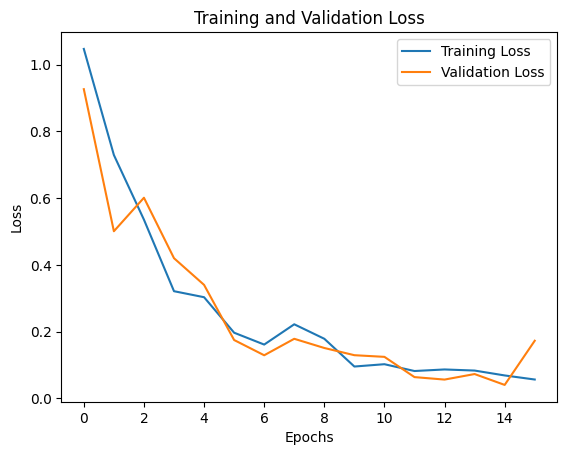

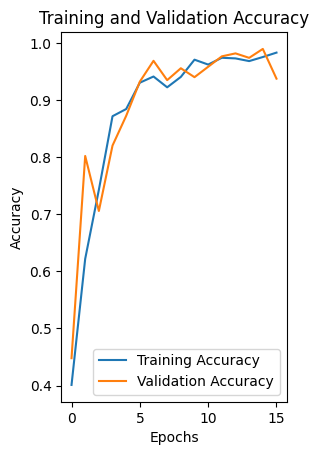

In [14]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


actual data
Tomato_Leaf_Mold
model prediction
1/1 [==============================] - 0s 397ms/step
Tomato_Leaf_Mold


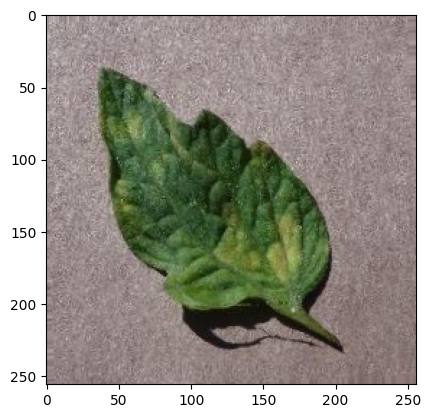

In [16]:
for image_batch, lable_batch in test_gen:
        f_img= image_batch[0]
        f_lable = int(lable_batch[0])
        
        print("actual data")
        print(class_names[f_lable])
        plt.imshow(f_img)
        
        print("model prediction")
        prediction = model.predict(image_batch)
        print(class_names[np.argmax(prediction[0])])
        
        break

In [17]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    #creating a batch
    img_array = tf.expand_dims(img_array,0)
    
    prediction = model.predict(img_array)
    
    prediction_class = class_names[np.argmax(prediction[0])]
    confidance = round(100*(np.max((prediction[0]))),2)
    return prediction_class, confidance

1/1 [==============================] - 0s 24ms/step


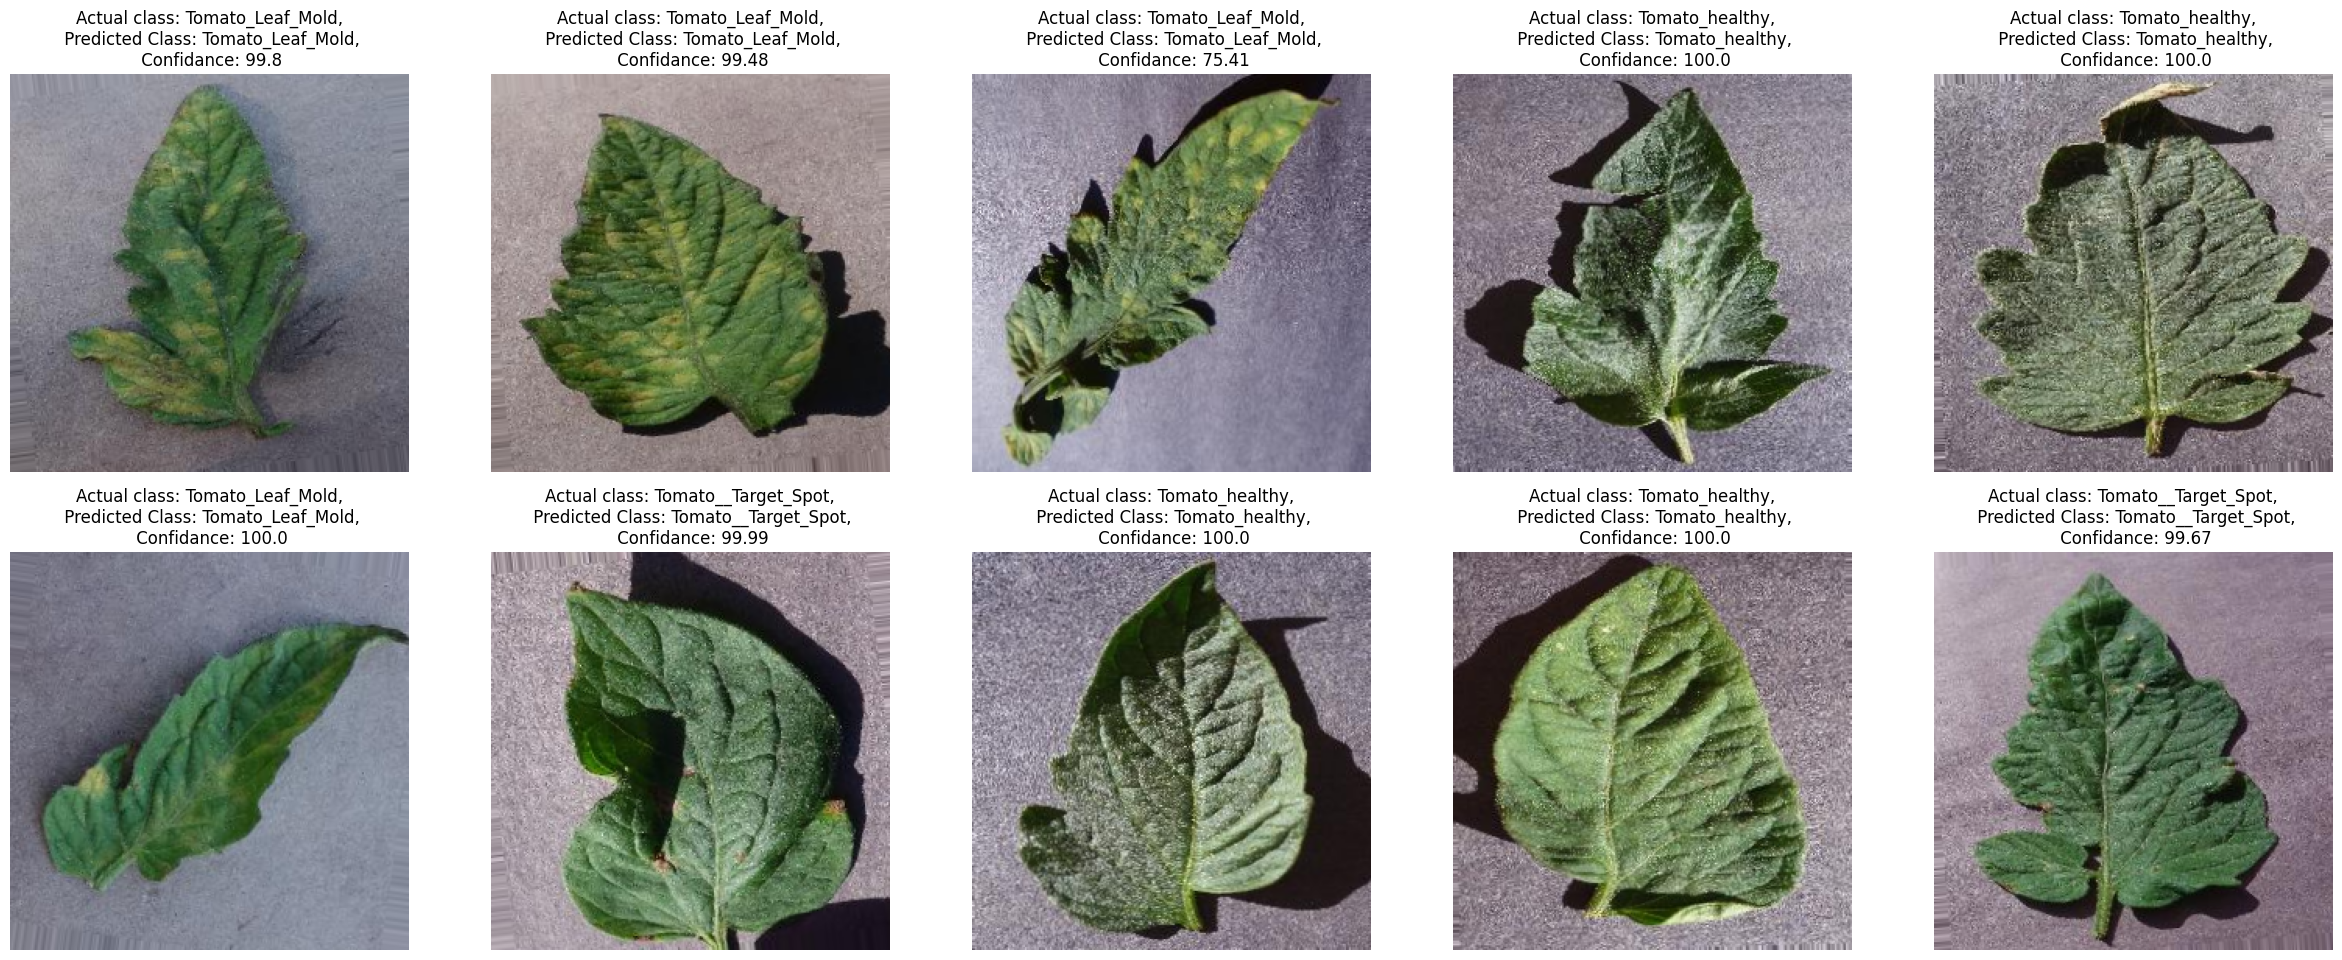

In [19]:
plt.figure(figsize=(30,30))
for images, labels in test_gen:
    for i in range (10):
        ax = plt.subplot(5,5,i+1)
        plt.imshow(images[i])
        plt.axis("off")
        
        predicted_class, confidance = predict(model,images[i])
        actual_class = class_names[int(labels[i])]
        
        plt.title(f"Actual class: {actual_class},\n Predicted Class: {predicted_class},\n Confidance: {confidance}")
    break

In [20]:
model.save("tomatoes.h5")

C:\Users\kalan\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
